In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
import warnings
warnings.filterwarnings('ignore')

In [14]:
dengue = pd.read_csv('dataset\\dengue.csv')

In [15]:
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


In [16]:
dengue.dtypes

Month            object
Year              int64
Region           object
Dengue_Cases      int64
Dengue_Deaths     int64
dtype: object

In [17]:
dengue['Region'] = dengue['Region'].astype("category")
dengue['Month'] = pd.Categorical(dengue['Month'], categories=[
    'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)
dengue['Year'] = dengue['Year'].astype(int)

In [18]:
dengue.dtypes

Month            category
Year                int64
Region           category
Dengue_Cases        int64
Dengue_Deaths       int64
dtype: object

<h1>1. Yearly Trend of Dengue Cases (2016-2020) </h1>

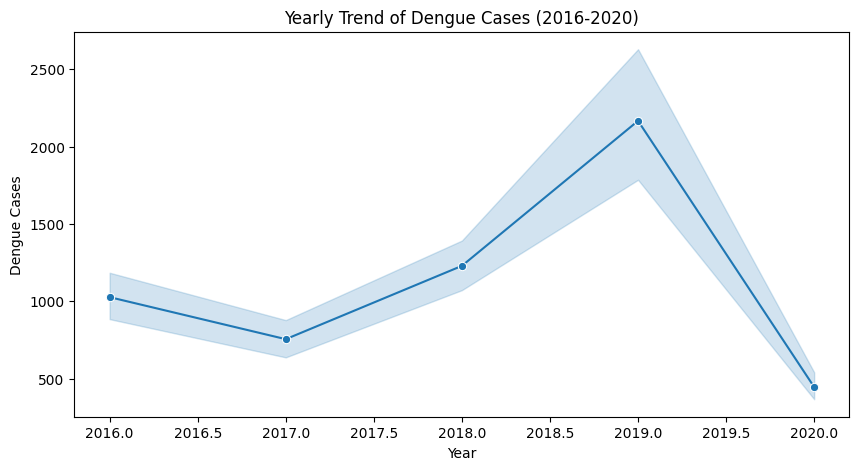

In [19]:
plt.figure(figsize=(10,5))
sns.lineplot(data=dengue[dengue['Year'].between(2016, 2020)], x='Year', y='Dengue_Cases', marker='o')
plt.title('Yearly Trend of Dengue Cases (2016-2020)')
plt.xlabel('Year')
plt.ylabel('Dengue Cases')
plt.show()

<h1>2. Monthly Trend of Dengue Cases (Average per Month) </h1>

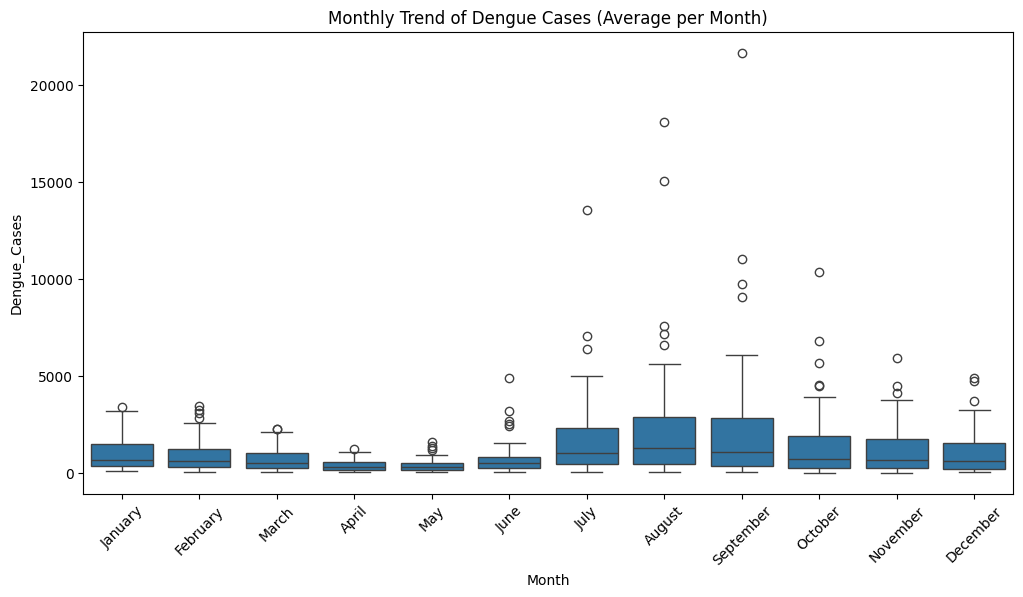

In [21]:
plt.figure(figsize=(12,6))
sns.boxplot(data=dengue, x='Month', y='Dengue_Cases')
plt.title('Monthly Trend of Dengue Cases (Average per Month)')
plt.xticks(rotation=45)
plt.show()

<h1>3. Yearly Trend of Dengue Deaths (2016-2020) </h1>

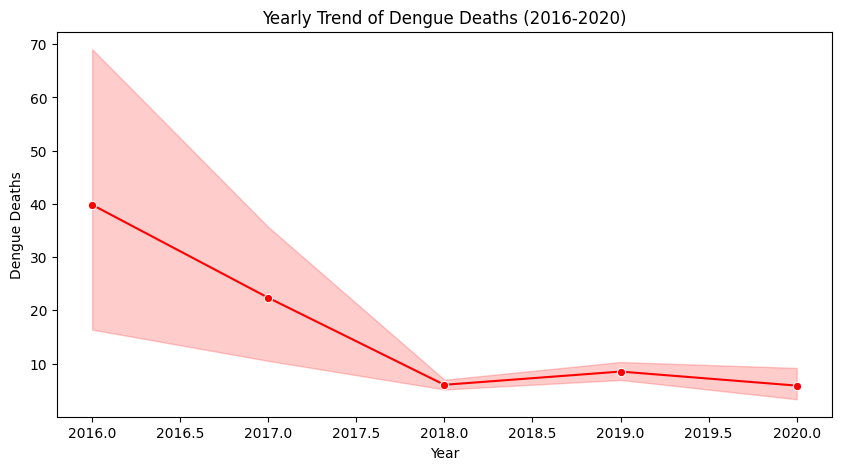

In [20]:
plt.figure(figsize=(10,5))
sns.lineplot(data=dengue[dengue['Year'].between(2016, 2020)], x='Year', y='Dengue_Deaths', marker='o', color='red')
plt.title('Yearly Trend of Dengue Deaths (2016-2020)')
plt.xlabel('Year')
plt.ylabel('Dengue Deaths')
plt.show()

<h1>4. Monthly Distribution of Dengue Deaths (2016-2020) </h1>

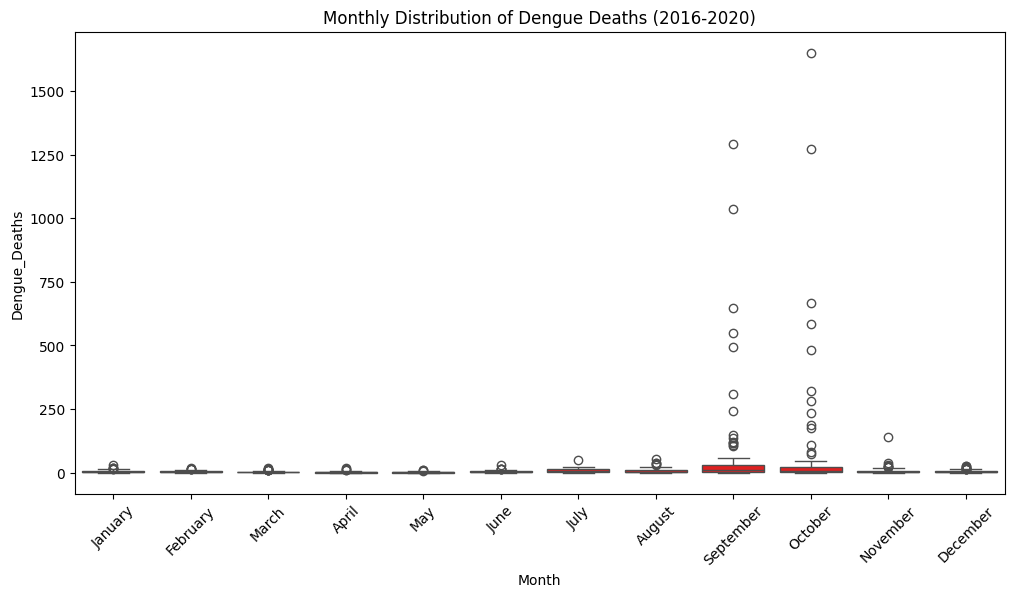

In [24]:
plt.figure(figsize=(12,6))
sns.boxplot(data=dengue[dengue['Year'].between(2016, 2020)], x='Month', y='Dengue_Deaths', color='red')
plt.title('Monthly Distribution of Dengue Deaths (2016-2020)')
plt.xticks(rotation=45)
plt.show()

<h1>5. Correlation Heatmap between Dengue Cases and Deaths </h1>

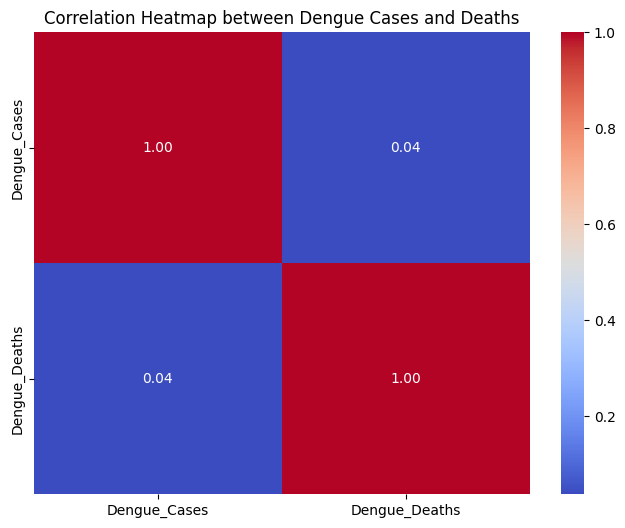

In [23]:
plt.figure(figsize=(8,6))
sns.heatmap(dengue[['Dengue_Cases', 'Dengue_Deaths']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap between Dengue Cases and Deaths')
plt.show()

<h1>6. Regional Distribution of Dengue Cases in 2016 </h1>

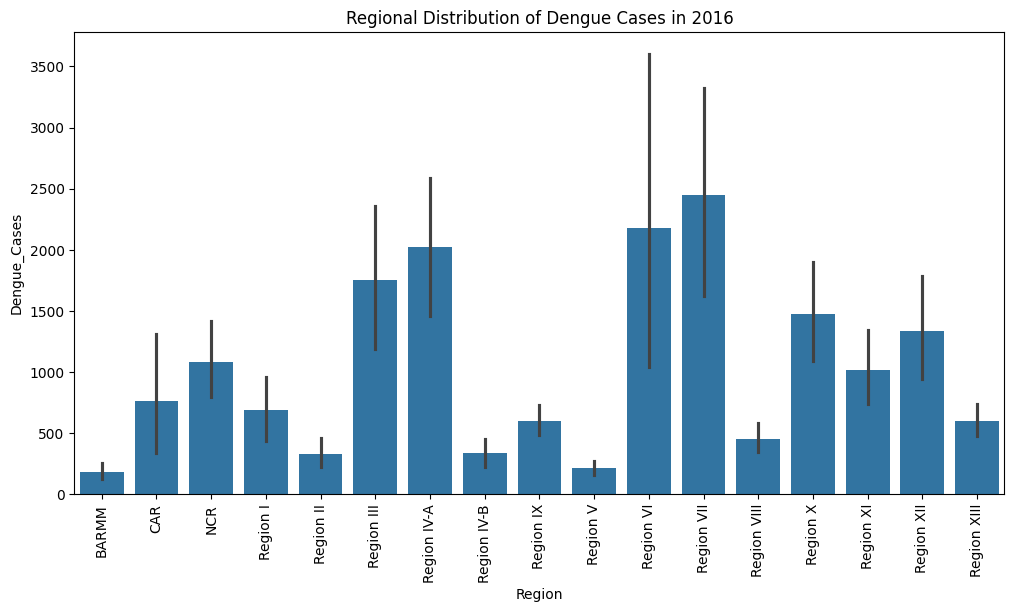

In [22]:
plt.figure(figsize=(12,6))
sns.barplot(data=dengue[dengue['Year'] == 2016], x='Region', y='Dengue_Cases')
plt.title('Regional Distribution of Dengue Cases in 2016')
plt.xticks(rotation=90)
plt.show()

<h1>7. Regional Distribution of Dengue Deaths in 2016</h1>

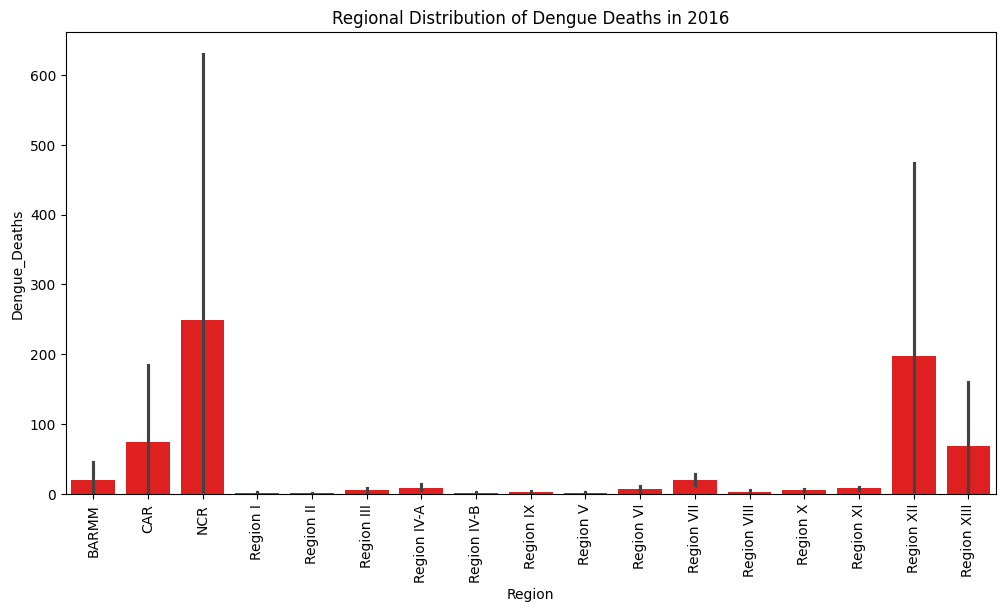

In [25]:
plt.figure(figsize=(12,6))
sns.barplot(data=dengue[dengue['Year'] == 2016], x='Region', y='Dengue_Deaths', color='red')
plt.title('Regional Distribution of Dengue Deaths in 2016')
plt.xticks(rotation=90)
plt.show()

<h1>8. Moving Average of Dengue Cases (2016-2020)</h1>

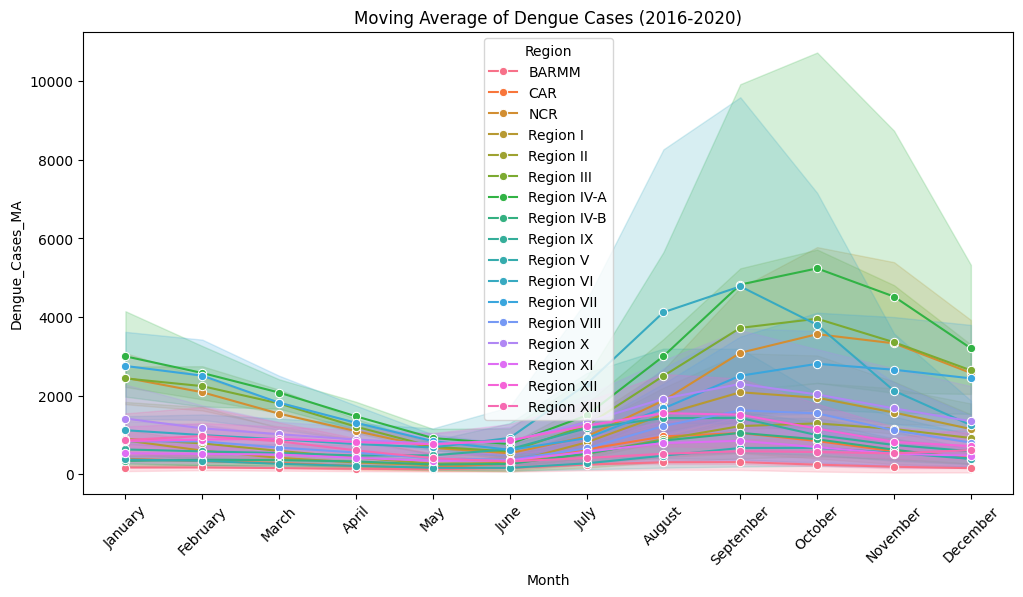

In [27]:
plt.figure(figsize=(12,6))
dengue['Dengue_Cases_MA'] = dengue.groupby('Region')['Dengue_Cases'].transform(lambda x: x.rolling(window=3).mean())
sns.lineplot(data=dengue[dengue['Year'].between(2016, 2020)], x='Month', y='Dengue_Cases_MA', hue='Region', marker='o')
plt.title('Moving Average of Dengue Cases (2016-2020)')
plt.xticks(rotation=45)
plt.show()

<h1>9. Monthly Trend of Dengue Cases by Region (2016-2020)</h1>

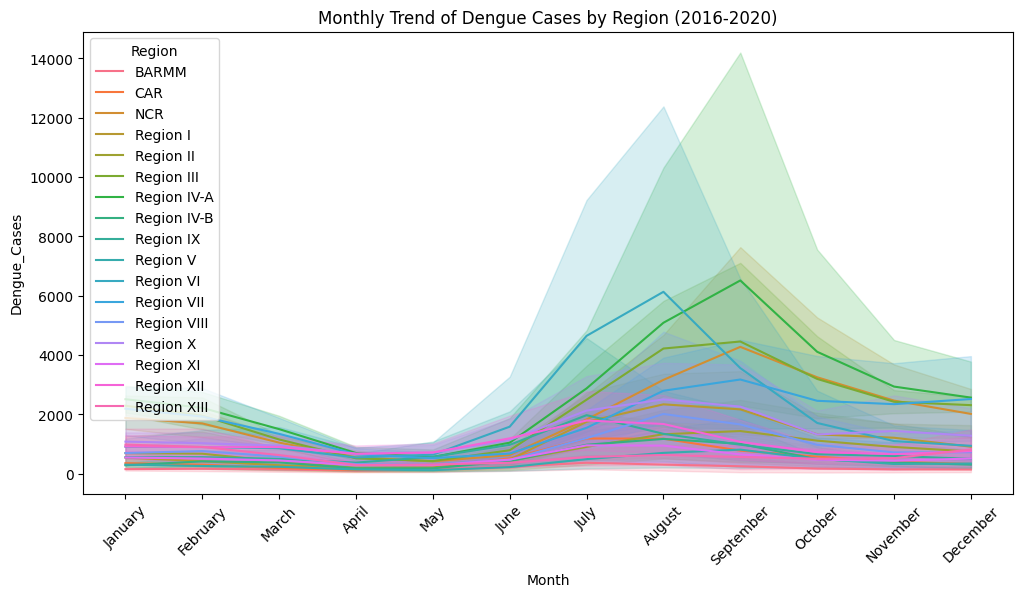

In [28]:
# 9. Region-wise Monthly Trend of Dengue Cases (2016-2020)
plt.figure(figsize=(12,6))
sns.lineplot(data=dengue[dengue['Year'].between(2016, 2020)], x='Month', y='Dengue_Cases', hue='Region')
plt.title('Monthly Trend of Dengue Cases by Region (2016-2020)')
plt.xticks(rotation=45)
plt.show()

<h1>10. Monthly Trend of Dengue Deaths by Region (2016-2020)</h1>

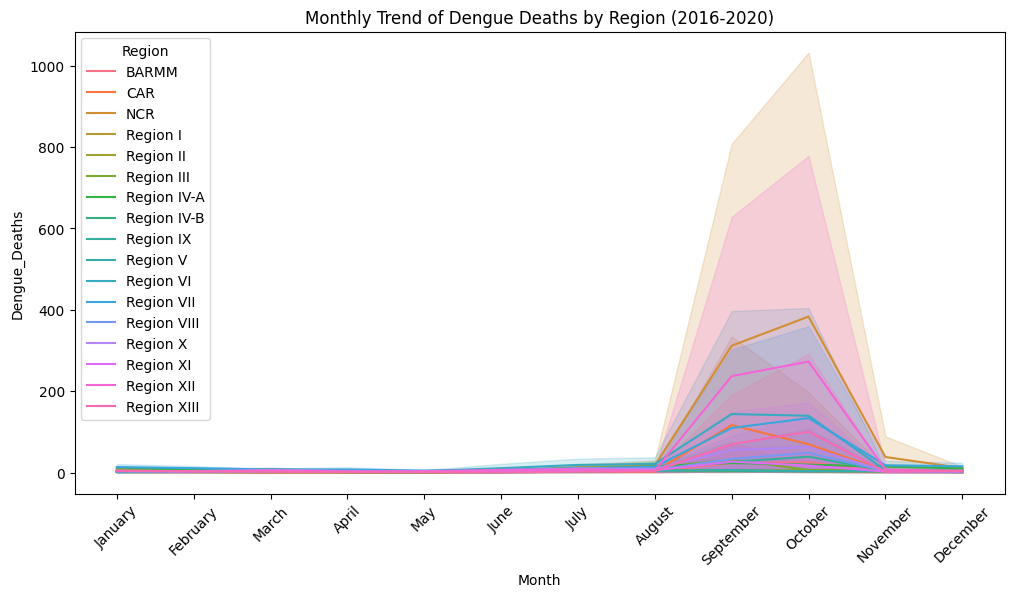

In [29]:
plt.figure(figsize=(12,6))
sns.lineplot(data=dengue[dengue['Year'].between(2016, 2020)], x='Month', y='Dengue_Deaths', hue='Region', color='red')
plt.title('Monthly Trend of Dengue Deaths by Region (2016-2020)')
plt.xticks(rotation=45)
plt.show()

<h1>11. Yearly Comparison of Dengue Cases (2016-2020) </h1>

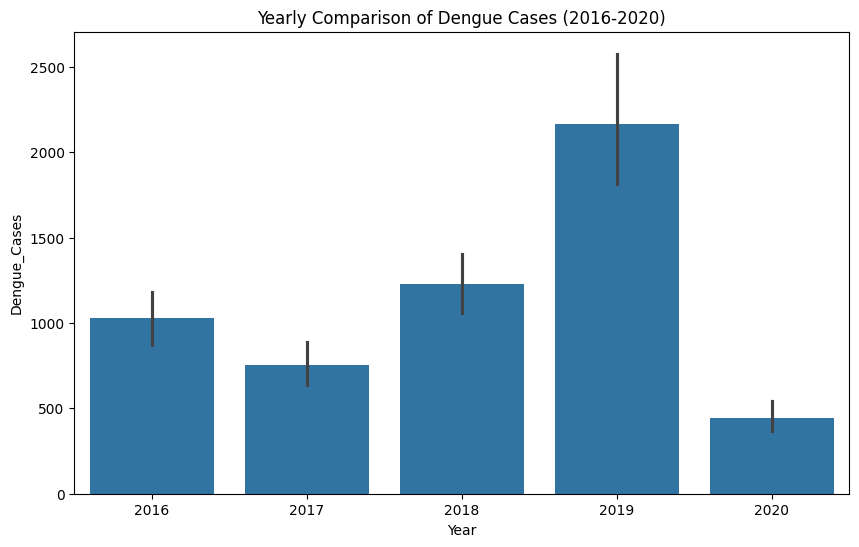

In [30]:
plt.figure(figsize=(10,6))
sns.barplot(data=dengue[dengue['Year'].between(2016, 2020)], x='Year', y='Dengue_Cases')
plt.title('Yearly Comparison of Dengue Cases (2016-2020)')
plt.show()

<h1>12. Yearly Comparison of Dengue Deaths (2016-2020) </h1>

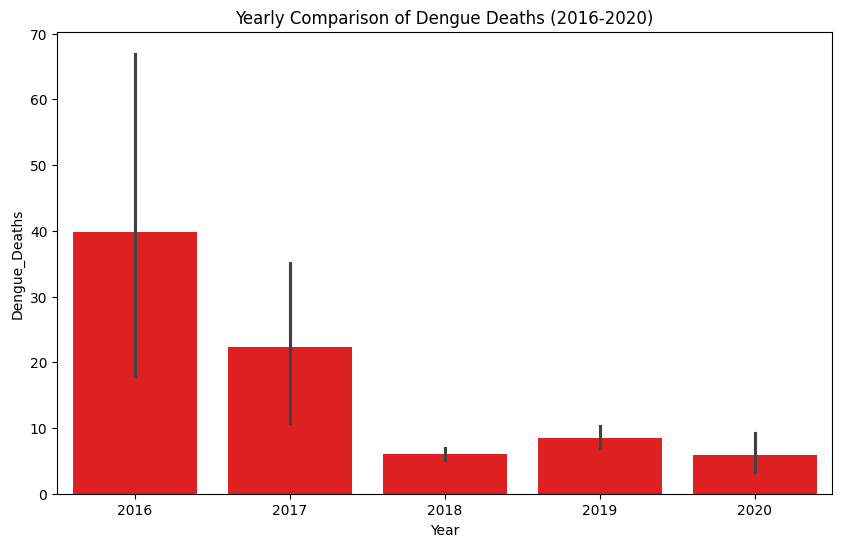

In [32]:
plt.figure(figsize=(10,6))
sns.barplot(data=dengue[dengue['Year'].between(2016, 2020)], x='Year', y='Dengue_Deaths', color='red')
plt.title('Yearly Comparison of Dengue Deaths (2016-2020)')
plt.show()

<h1>13. Dengue Case Fatality Rate (CFR) over Time (2016-2020)</h1>

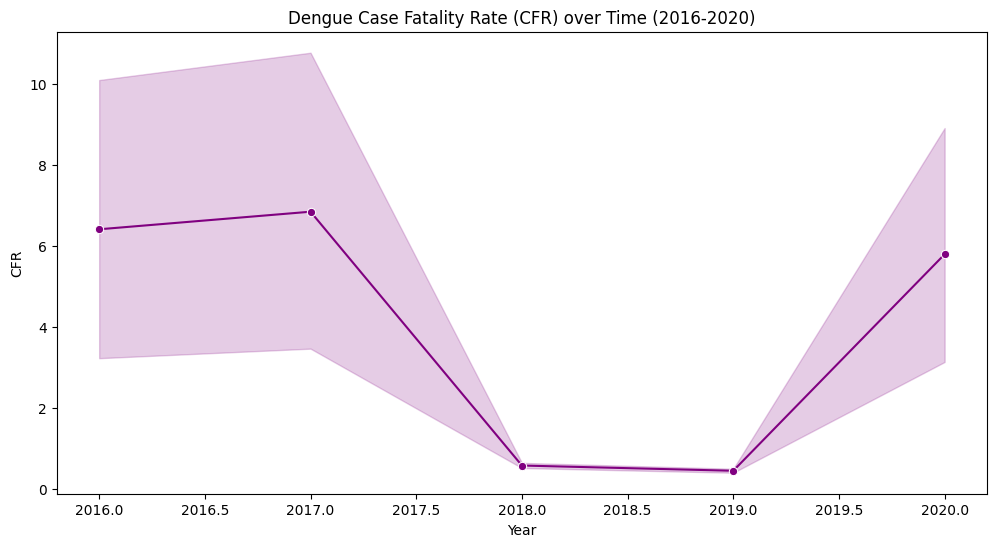

In [33]:
dengue['CFR'] = dengue['Dengue_Deaths'] / dengue['Dengue_Cases'] * 100
plt.figure(figsize=(12,6))
sns.lineplot(data=dengue[dengue['Year'].between(2016, 2020)], x='Year', y='CFR', marker='o', color='purple')
plt.title('Dengue Case Fatality Rate (CFR) over Time (2016-2020)')
plt.show()

<h1>14. Total Dengue Cases by Region (2016-2020) </h1>

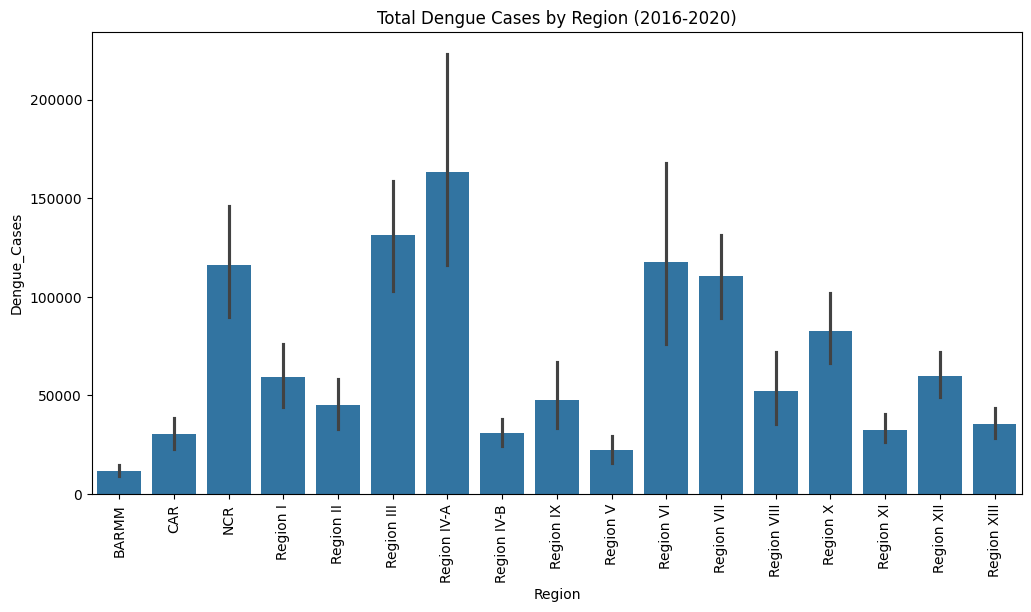

In [35]:
plt.figure(figsize=(12,6))
sns.barplot(data=dengue[dengue['Year'].between(2016, 2020)], x='Region', y='Dengue_Cases', estimator=np.sum)
plt.title('Total Dengue Cases by Region (2016-2020)')
plt.xticks(rotation=90)
plt.show()

<h1>15. Monthly Dengue Cases for 2020 </h1>

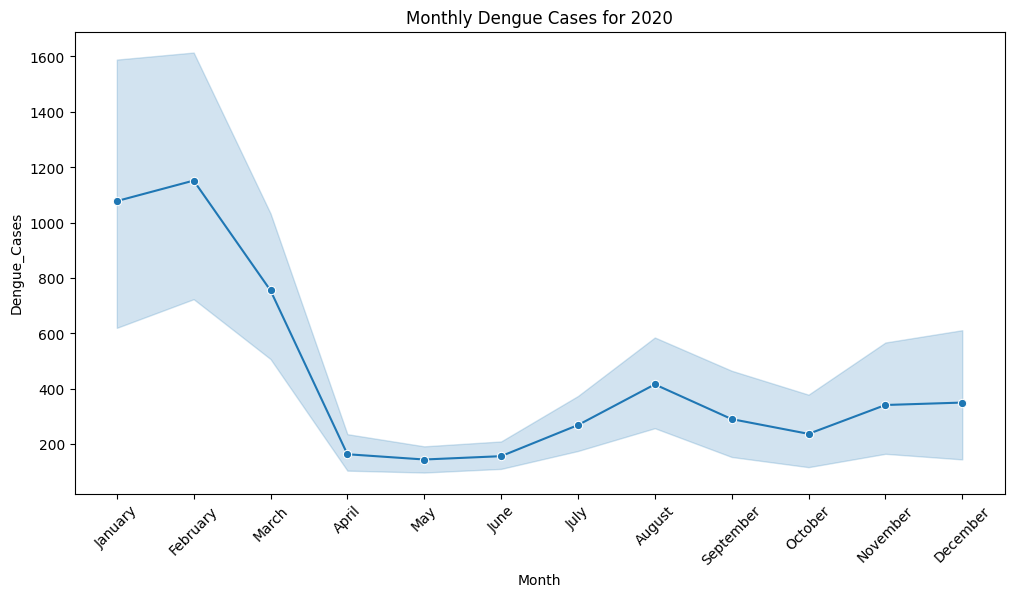

In [36]:
plt.figure(figsize=(12,6))
sns.lineplot(data=dengue[dengue['Year'] == 2020], x='Month', y='Dengue_Cases', marker='o')
plt.title('Monthly Dengue Cases for 2020')
plt.xticks(rotation=45)
plt.show()

<h1>16. Monthly Dengue Deaths for 2020 </h1>

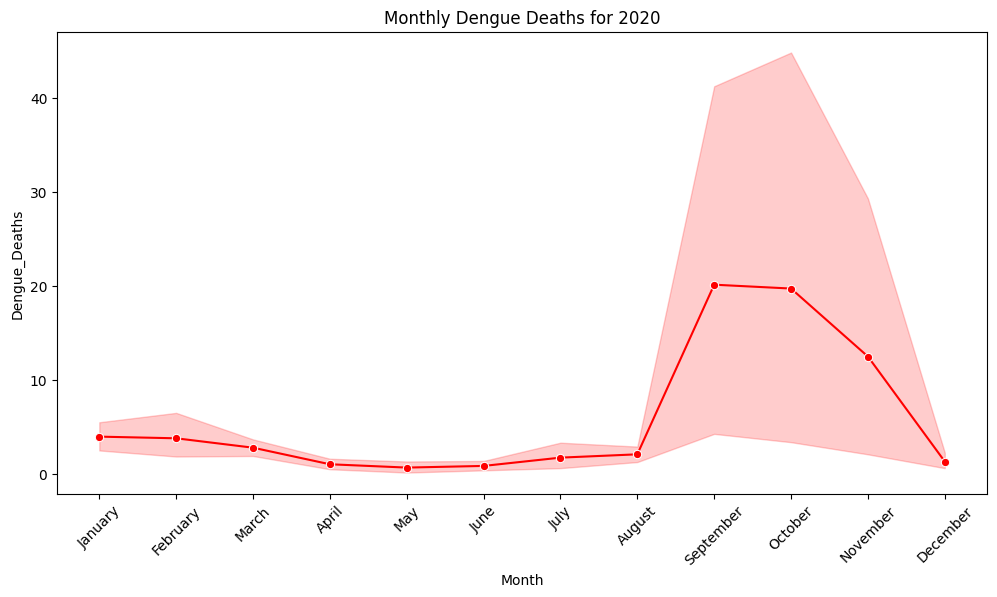

In [39]:
plt.figure(figsize=(12,6))
sns.lineplot(data=dengue[dengue['Year'] == 2020], x='Month', y='Dengue_Deaths', marker='o', color='red')
plt.title('Monthly Dengue Deaths for 2020')
plt.xticks(rotation=45)
plt.show()

<h1>17. Year-over-Year Dengue Cases Change (2016-2020) </h1>

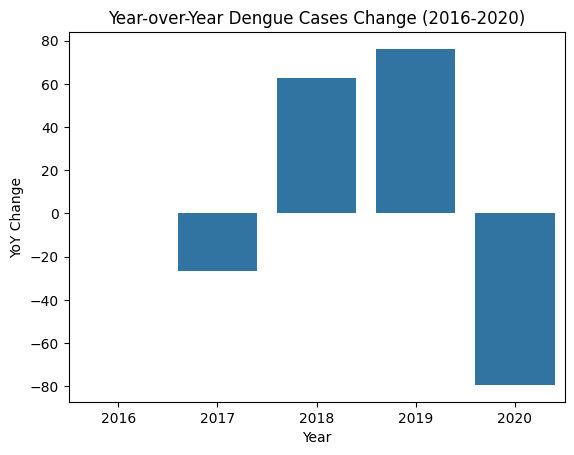

In [40]:
df_yearly_cases = dengue.groupby('Year')['Dengue_Cases'].sum().reset_index()
df_yearly_cases['YoY Change'] = df_yearly_cases['Dengue_Cases'].pct_change() * 100
sns.barplot(data=df_yearly_cases, x='Year', y='YoY Change')
plt.title('Year-over-Year Dengue Cases Change (2016-2020)')
plt.show()

<h1>18. Dengue Death Rate Change (2016-2020) </h1>

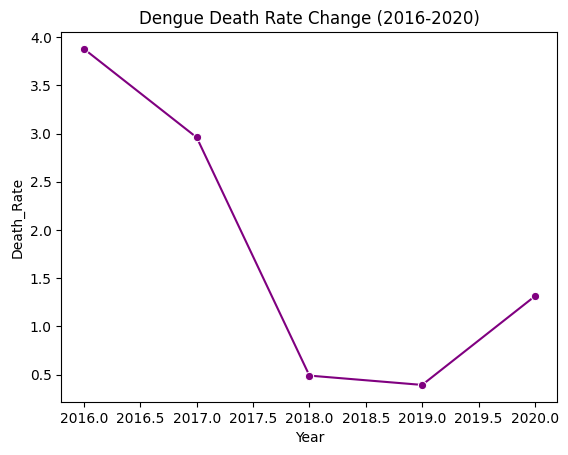

In [41]:
df_yearly_death_rate = dengue.groupby('Year').apply(lambda x: x['Dengue_Deaths'].sum() / x['Dengue_Cases'].sum() * 100).reset_index(name='Death_Rate')
sns.lineplot(data=df_yearly_death_rate, x='Year', y='Death_Rate', marker='o', color='purple')
plt.title('Dengue Death Rate Change (2016-2020)')
plt.show()

<h1>19. Percentage Contribution of Dengue Cases by Region (2016-2020) </h1>

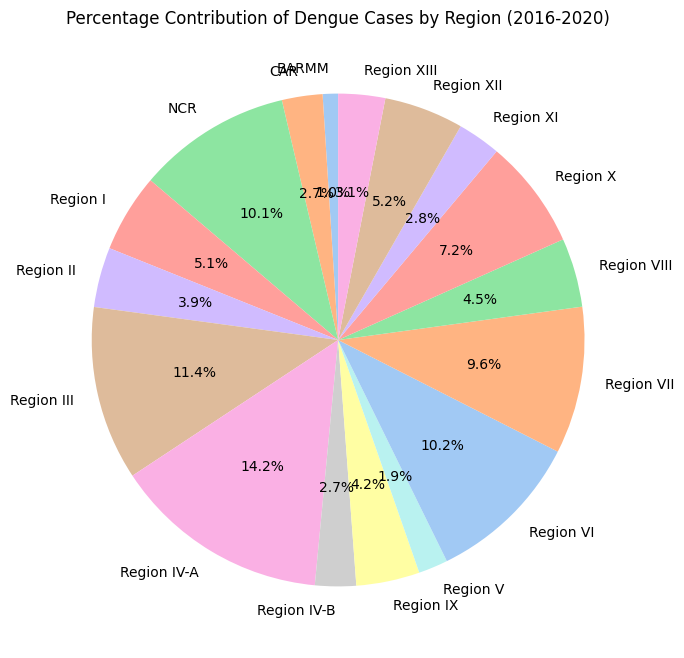

In [43]:
region_cases = dengue[dengue['Year'].between(2016, 2020)].groupby('Region')['Dengue_Cases'].sum()
plt.figure(figsize=(8,8))
region_cases.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title('Percentage Contribution of Dengue Cases by Region (2016-2020)')
plt.ylabel('')
plt.show()

<h1>20. Dengue Deaths vs Cases (2016-2020) </h1>

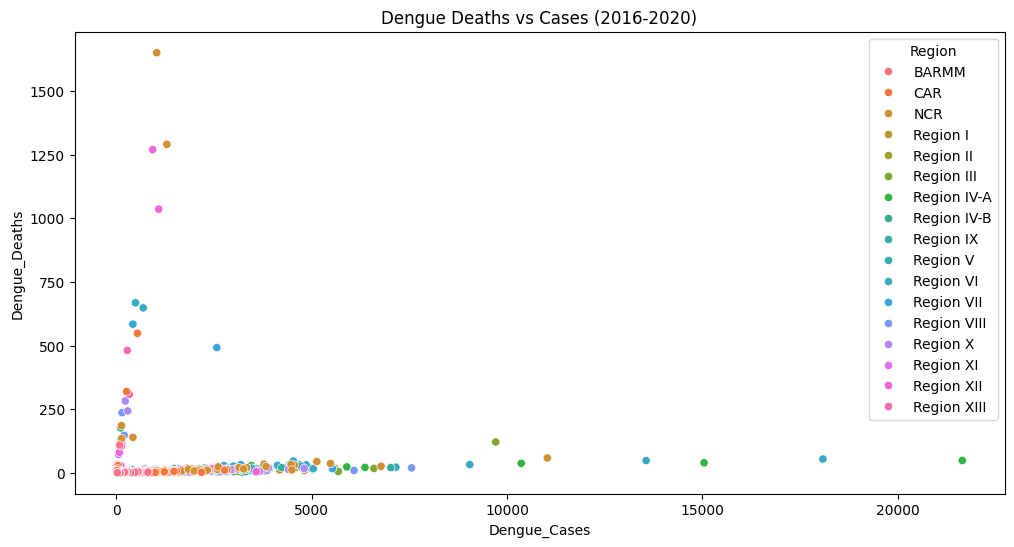

In [44]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=dengue[dengue['Year'].between(2016, 2020)], x='Dengue_Cases', y='Dengue_Deaths', hue='Region')
plt.title('Dengue Deaths vs Cases (2016-2020)')
plt.show()